In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Environment_Wildlife_Stories_Cleaned.csv')

In [4]:
df

,headline,excerpt,display date,month,day,year
0,NJ schools paid to study flood risks,New Jersey is spending $1.3 million to study w...,"September 13, 2013",September,13,2013
1,Flushable' wipes blamed for sewer clogs,Increasingly popular bathroom wipes — pre-mois...,"September 23, 2013",September,23,2013
2,Cuomo demands Plum Island cleanup plan,MINEOLA — New York state is demanding a review...,"October 1, 2013",October,1,2013
3,Behind Michelle Obama’s water war,"Michelle Obama wants you to drink more water, ...","October 2, 2013",October,2,2013
4,Anti-fracking activists learn to work with gas...,"PITTSBURGH — For years, activists have warned ...","October 7, 2013",October,7,2013
...,...,...,...,...,...,...
2235,"Elephant charges at tourists, shoves flounderi...",“She was incredibly lucky. Had the elephant he...,"September 29, 2025",September,29,2025
2236,Birds are behaving strangely — and it could ha...,Is it the sign of the a-flock-alypse?,"October 7, 2025",October,7,2025
2237,Is your car a poop magnet? Birds prefer using ...,NaN,"October 14, 2025",October,14,2025
2238,Polar bears take over abandoned Soviet-era res...,NaN,"October 15, 2025",October,15,2025


In [5]:
df.value_counts('year')

year
2019    489
2020    338
2021    311
2018    241
2017    157
2024    157
2022    153
2023    129
2025    103
2016     65
2015     46
2014     27
2013     24
Name: count, dtype: int64

In [6]:
_2013 = df['year'] == 2013
_2014 = df['year'] == 2014
_2015 = df['year'] == 2015
_2016 = df['year'] == 2016
_2017 = df['year'] == 2017
_2018 = df['year'] == 2018
_2019 = df['year'] == 2019
_2020 = df['year'] == 2020
_2021 = df['year'] == 2021
_2022 = df['year'] == 2022
_2023 = df['year'] == 2023
_2024 = df['year'] == 2024
_2025 = df['year'] == 2025

In [7]:
df[_2020]['headline']

1049    Australian bushfire death toll rises to 17 as ...
1050    Amazon threatens to ax workers who spoke out a...
1051    Fires threaten Sydney suburbs as strong winds ...
1052    No meat, no problem: Demand for vegetarian, ve...
1053    NJ beach to build sand dunes with 2,000 old Ch...
                              ...                        
1382    This researcher is working on turning chicken ...
1383    Antarctica rocked by 30,000 tremors in three m...
1384    Organic meat is just as bad for the environmen...
1385    Mask overboard! COVID-19 fuels ocean pollution...
1386    Thousands in Colorado without heat after vanda...
Name: headline, Length: 338, dtype: object

In [8]:
winters = df['month'].str.contains('December|January|February')
springs = df['month'].str.contains('March|April|May')
summers = df['month'].str.contains('June|July|August')
autumns = df['month'].str.contains('September|October|November')

In [9]:
df.headline.str.split(expand=True).stack().value_counts()

to         664
in         494
of         418
the        345
for        228
          ... 
$3.6         1
CVS          1
Basel        1
Art          1
fallen’      1
Name: count, Length: 7157, dtype: int64

In [10]:
import re
from nltk.corpus import stopwords
import nltk

In [11]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
words = (
    df.headline
      .str.replace(r'[^\w\s]', '', regex=True)
      .str.split(expand=True)
      .stack()
      .str.lower()
)

filtered_words = words[~words.isin(stop_words)]

all_word_counts = filtered_words.value_counts()

print(all_word_counts)

climate       283
change        160
new           139
scientists    114
us            105
             ... 
decimated       1
emmys           1
remain          1
critically      1
fallen          1
Name: count, Length: 5606, dtype: int64


<Axes: >

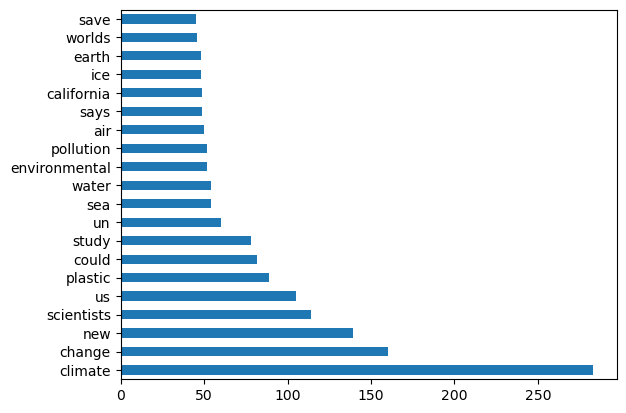

In [14]:
all_word_counts.head(20).plot(kind='barh')

In [15]:
words = (
    df[_2025].headline
      .str.replace(r'[^\w\s]', '', regex=True)
      .str.split(expand=True)
      .stack()
      .str.lower()
)

filtered_words = words[~words.isin(stop_words)]

_2025_word_counts = filtered_words.value_counts()

print(_2025_word_counts)
#all years value_counts are saved

scientists       10
new              10
first             7
microplastics     7
could             6
                 ..
migrating         1
arctic            1
millions          1
tuning            1
fallen            1
Name: count, Length: 756, dtype: int64


In [16]:
toxic = df['excerpt'].str.contains('toxic', case=False)|df['headline'].str.contains('toxic', case=False)

In [17]:
pd.set_option('display.max_colwidth', 150)
df[toxic]

,headline,excerpt,display date,month,day,year
34,Thick blanket of toxic smog forces London's kids inside,London fog has given way to London smog. A toxic brew of local and European pollution and blowing sand from the Sahara has covered London in a cho...,"April 3, 2014",April,3,2014
47,Newtown Creek to get $16M for Superfund cleanup,A Superfund cleanup of toxic Newtown Creek is expected to get a $16 million cash infusion after the federal government on Tuesday reached a settle...,"October 22, 2014",October,22,2014
68,EPA's toxic waste spill might be a lot worse than anyone thought,"ALBUQUERQUE, N.M. — Anger was mounting Monday at the federal Environmental Protection Agency over the massive spill of millions of gallons of toxi...","August 10, 2015",August,10,2015
69,Residents want straight answers on water supply after EPA's toxic spill,"ALBUQUERQUE, N.M. — Townspeople watching millions of gallons of orange-colored mine waste flow through their communities demanded clarity Tuesday ...","August 11, 2015",August,11,2015
92,Sea lions have brain damage from toxic algae,"A toxin produced by marine algae is inflicting brain damage on sea lions along California's coast, causing neurological and behavioral changes tha...","December 16, 2015",December,16,2015
157,Thousands of snow geese die after landing on Superfund site,"Thousands of white snow geese died after landing in a toxic open pit mine while trying to escape a Montana snowstorm. The 700-acre Berkeley pit, w...","December 7, 2016",December,7,2016
177,1.7 million kids die every year from our toxic world,"More than one in four deaths of the world’s children under the age of 5 are attributable to unhealthy environments, two new reports by the Geneva-...","March 6, 2017",March,6,2017
198,This plastic-loving caterpillar could eat up all our waste,Mother Earth is one seriously gracious host. Humanity has done little else to the planet that produced us than completely destroy it at every turn...,"April 25, 2017",April,25,2017
263,How illegal pot farms are poisoning the environment,"SACRAMENTO, Calif. - Toxic chemicals from illegal marijuana farms hidden deep in California’s forests are showing up in rivers and streams that fe...","September 8, 2017",September,8,2017
306,Brewery makes point about water quality with green beer,"TOLEDO, Ohio - A brewery in Ohio is making a batch of green-colored beer called ""Algae Blooms"" to draw attention to the toxic algae that's been fo...","November 30, 2017",November,30,2017


In [18]:
microplastic = df['excerpt'].str.contains('microplastic', case=False)|df['headline'].str.contains('microplastic', case=False)

In [19]:
pd.set_option('display.max_colwidth', 150)
df[microplastic]

,headline,excerpt,display date,month,day,year
546,Every single species of sea turtle has microplastics in its gut,"All seven species of sea turtles were found to have microplastics in their stomachs, according to a new study. “This study provides more evidence ...","December 5, 2018",December,5,2018
817,Scientists find 'enormous concentrations' of microplastics in Arctic,"Scientists say they’ve found an abundance of tiny plastic particles in Arctic snow, indicating that so-called microplastics are being sucked into ...","August 15, 2019",August,15,2019
827,UN admits data is 'weak' for impact of microplastics in drinking water,"GENEVA — The World Health Organization says the levels of microplastics in drinking water don’t appear to be risky, but that research has been spo...","August 21, 2019",August,21,2019
841,New research targets microplastics detected in Lake Tahoe,"RENO, Nev. — The fallout from humanity’s addiction to plastics is showing up in the waters of Lake Tahoe. Scientists detected microplastics at sev...","September 2, 2019",September,2,2019
863,"Florida's Tampa Bay polluted with 4 billion particles of microplastic, study finds","The most typical source in the Tampa Bay study was from fibers originating in fishing lines, nets and synthetic clothes, the study discovered.","September 18, 2019",September,18,2019
1015,Microplastic pollution in the ocean is a lot worse than we previously thought,"The amount of microplastic in the world's oceans is a million times greater than previously thought, according to alarming new research.","December 5, 2019",December,5,2019
1185,Highest-ever concentration of microplastics found on seafloor,A new international research project revealed the highest concentration of microplastic ever seen on the seafloor -- up to 1.9 million pieces in a...,"May 6, 2020",May,6,2020
2164,Microplastics linked to 3 chronic diseases — and now they've been detected in gum,A new study suggests that you could be ingesting thousands of microplastics every time you chew gum. This discovery comes amid mounting evidence c...,"March 25, 2025",March,25,2025
2180,Microplastics are 'far from benign' — here's how they can devastate your body,"""Although microplastics aren’t the most dangerous agent we may encounter, they are far from benign,” said study author Adam Soloff.","May 19, 2025",May,19,2025
2184,Microplastics are everywhere — including your laundry — a device helps eradicate them,"These minute particles have been linked to a laundry list of concerns, including a higher risk of heart attack, stroke and certain cancers.","May 23, 2025",May,23,2025


In [20]:
trump = df['excerpt'].str.contains('trump', case=False)|df['headline'].str.contains('trump', case=False)

In [50]:
pd.set_option('display.max_colwidth', 500)
df[trump]

,headline,excerpt,display date,month,day,year
96,Trump defends grooming ritual: 'I wanna use hair spray!',"WASHINGTON — Donald Trump claims lefty tree huggers have gone way too far this time — by going after his much-needed hair products. Of all the “stupid” government regulations, the...","December 31, 2015",December,31,2015
153,Trump win opens way for China to take climate leadership role,The election of climate change skeptic Donald Trump as president is likely to end the U.S. leadership role in the international fight against global warming and may lead to the...,"November 11, 2016",November,11,2016
165,Environmentalists are 'out of control': Trump to auto execs,"President Trump told auto execs Tuesday that environmentalists are ""out of control."" “I am, to a large extent, an environmentalist,” Trump told the CEOs of Ford, GM and Fiat Chrysler...","January 24, 2017",January,24,2017
181,The Keystone pipeline is a plus for the environment,"The Trump administration approved a permit for the controversial Keystone XL project Friday morning — a whopping 3,108 days after Trans-Canada first applied to the State Department to build the...","March 24, 2017",March,24,2017
182,"No, Trump's energy moves aren't dooming the planet","President Trump’s “contempt for clean air, clean water and our clean energy future endangers the health of our children,” thundered Nancy Pelosi on Tuesday. Please. Trump’s moves to roll back...","March 28, 2017",March,28,2017
188,Democrats' foul-mouthed strategy and other comments,Reporter: Dems Trying To Cuss Their Way Back to Power Democrats seem to be taking a page from President Trump’s often-earthy language and “are letting loose four-letter words in public...,"April 11, 2017",April,11,2017
189,At least 800 species will be affected by Mexican border wall,"MEXICO CITY – A study by Mexico’s top university has revealed that at least 800 species of wildlife will be adversely affected by President Trump’s planned 2,000-mile border wall with...","April 11, 2017",April,11,2017
206,The critical coal plant Trump may not be able to save,"A coal plant located thousands of miles from Appalachia could close in two years. And when that happens, it won’t be white, working-class Americans who are devastated — but an...","May 6, 2017",May,6,2017
217,"If Trump won't dump Paris deal, he's a chump","For a bull in the china shop, President Trump has so far gingerly stepped around the Paris climate accord. That dance could end as soon as this week, with Trump...","May 30, 2017",May,30,2017
219,"In ditching Paris deal, Trump does right by America and the world","In quitting the Paris Accord, President Trump on Thursday did nothing to shift the course of US environmental policy — not even on carbon emissions. But he did put the...","June 1, 2017",June,1,2017


In [73]:
df.sample(n=1)

,headline,excerpt,display date,month,day,year
1017,This village has been overrun with polar bears and the reason is tragic,A village in Russia's Far North has been overrun by more than 50 polar bears.,"December 6, 2019",December,6,2019


In [66]:
df[microplastic].value_counts('year')

year
2025    7
2019    5
2018    1
2020    1
Name: count, dtype: int64

In [67]:
df[trump].value_counts('year')

year
2017    20
2020    15
2019    10
2018     8
2021     3
2015     1
2016     1
2024     1
Name: count, dtype: int64

In [68]:
df[toxic].value_counts('year')

year
2019    12
2018     8
2023     5
2017     4
2020     4
2015     3
2014     2
2021     2
2024     2
2016     1
2025     1
Name: count, dtype: int64